**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [3]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [4]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname  = "region.annotation.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.encode_chromatin_states.coverage.fcc.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.atac.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.crispri.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.fcc_crispri.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverage.fcc_starrmpra.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_junke.group.coverag

## Import data

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname = "region.annotation.encode_chromatin_states.coverage.fcc.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_merge_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 1280991      13

$fcc_astarr_macs_input_union
[1] 1755320      13



Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,cCREs,Low-DNase,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,10038,10405,chr1:10038-10405,ChromHMM,Quies,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,ChromHMM,Quies,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


**Check: Count table**

In [6]:
lst = lst_dat_region_merge_fcc_import
lst = lapply(lst, function(dat){
    res = table(dat$Group, dat$Assay_Label, dnn=c("Group", "Assay"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Region, Freq)
fun_display_table(dat)

Group,Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
cCREs,ASTARR,193629,277308
cCREs,CRISPRi-Growth,121985,137396
cCREs,CRISPRi-HCRFF,1301,1715
cCREs,LMPRA,102220,116451
cCREs,TMPRA,1540,2057
cCREs,WSTARR,190911,273809
ChromHMM,ASTARR,220963,343431
ChromHMM,CRISPRi-Growth,124614,142592
ChromHMM,CRISPRi-HCRFF,1443,2015
ChromHMM,LMPRA,103530,118901


In [7]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge_fcc_import
dat = lst[[idx]]

dat_region_merge_fcc = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10038,10405,chr1:10038-10405,cCREs,Low-DNase,-2.2348526,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,10038,10405,chr1:10038-10405,ChromHMM,Quies,-2.2348526,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,ChromHMM,Quies,0.0317904,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


In [17]:
fun_bstrap_interveral = function(vec_num_score, fun = `mean`, num_iteration = 1000, num_seed = 123){
    ### init
    set.seed(num_seed)
    
    ### column: num_iteraction
    ### row:    length(vec_num)
    mat = replicate(
        num_iteration,
        sample(vec_num_score, replace = TRUE, size = 1000)
    )

    vec = apply(mat, 2, fun)
    res = quantile(vec, probs = c(0, 0.025, 0.25, 0.5, 0.75, 0.975, 1))
    res = c(res, mean(vec), length(vec_num_score))
    names(res) = c("Min", "Ci95_Lw", "Q1", "Q2", "Q3", "Ci95_Up", "Max", "Mean", "N")
    return(res)
}

In [18]:
dat = dat_region_merge_fcc

lst = split(dat, dat$Assay_Label)
lst = lapply(lst, function(dat){
    lst_inner = split(dat$Zcore, dat$Label)
    lst_inner = lapply(lst_inner, fun_bstrap_interveral)
    dat = bind_rows(lst_inner, .id = "Annot_Label")
    return(dat)
})

dat = bind_rows(lst, .id = "Assay_Label")
dat_peak_score_summary = dat
head(dat)

Assay_Label,Annot_Label,Min,Ci95_Lw,Q1,Q2,Q3,Ci95_Up,Max,Mean,N
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASTARR,Biv,-0.62596610,-0.5864678,-0.5464760,-0.52915606,-0.51029394,-0.47508509,-0.40844814,-0.52912856,12367
ASTARR,CA-CTCF,-0.17763955,-0.1413776,-0.1079071,-0.09331127,-0.07643652,-0.04564488,-0.02601593,-0.09305614,20916
ASTARR,CA-H3K4me3,-0.73736185,-0.7068918,-0.6660377,-0.64386387,-0.61944815,-0.56967749,-0.53598461,-0.64222998,3144
ASTARR,CA-only,-0.23616961,-0.1898321,-0.1591546,-0.14208292,-0.12400605,-0.09340957,-0.05972181,-0.14204055,1279
ASTARR,CA-TF,0.06674645,0.1060857,0.1474325,0.16720883,0.18680295,0.22055874,0.27679830,0.16617894,23545
ASTARR,dELS,0.83091489,0.8683447,0.9113406,0.93561726,0.95757183,1.00304192,1.05335591,0.93505246,15332


In [19]:
dat = dat_peak_score_summary
table(dat$Annot_Label)


       Biv    CA-CTCF CA-H3K4me3    CA-only      CA-TF       dELS       Enh1 
         6          6          6          6          6          6          6 
      Enh2      EnhG1      EnhG2        Het  Low-DNase       pELS        PLS 
         6          6          6          6          6          6          6 
     Quies     ReprPC        Tss    TssFlnk   TssFlnkD   TssFlnkU         Tx 
         6          6          6          6          6          6          6 
      TxWk   ZNF/Rpts 
         6          6 

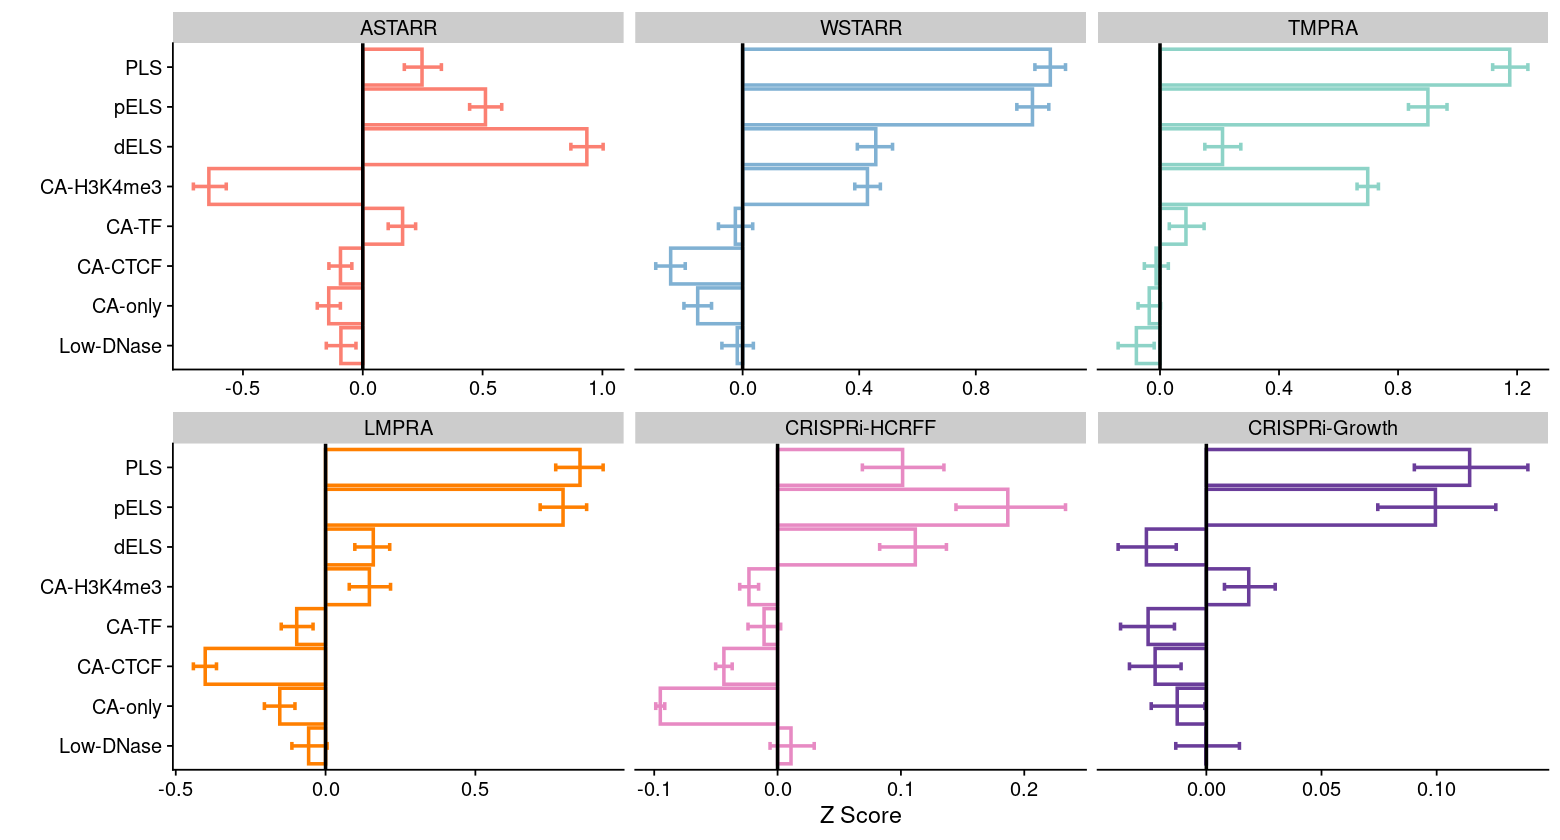

In [20]:
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase")
#vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase", "None")
vec_txt_color = c(
    "ASTARR" = "#fb8072", 
    "WSTARR" = "#80b1d3", 
    "TMPRA"  = "#8dd3c7", 
    "LMPRA"  = "#ff7f00",
    "CRISPRi-HCRFF"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

dat = dat_peak_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Annot_Label, 
            y     = Mean,
            group = Assay_Label,
            color = Assay_Label
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Annot_Label, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay_Label, 
            color = Assay_Label
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    #geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Z Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
    theme(legend.position = "None")

options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

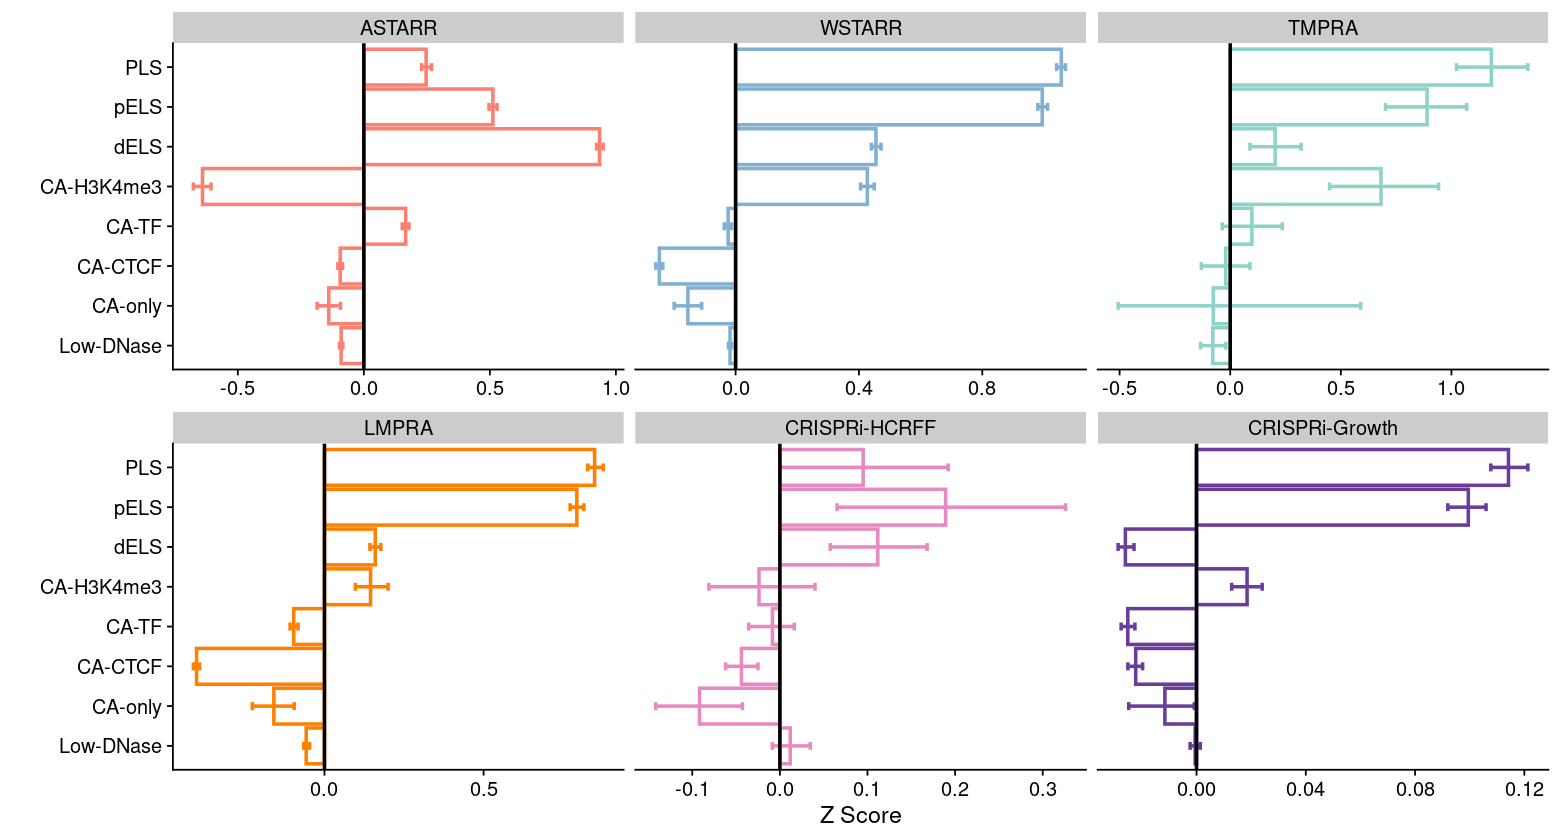

In [12]:
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase")
#vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase", "None")
vec_txt_color = c(
    "ASTARR" = "#fb8072", 
    "WSTARR" = "#80b1d3", 
    "TMPRA"  = "#8dd3c7", 
    "LMPRA"  = "#ff7f00",
    "CRISPRi-HCRFF"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

dat = dat_peak_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Annot_Label, 
            y     = Mean,
            group = Assay_Label,
            color = Assay_Label
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Annot_Label, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay_Label, 
            color = Assay_Label
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    #geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Z Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
    theme(legend.position = "None")

options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

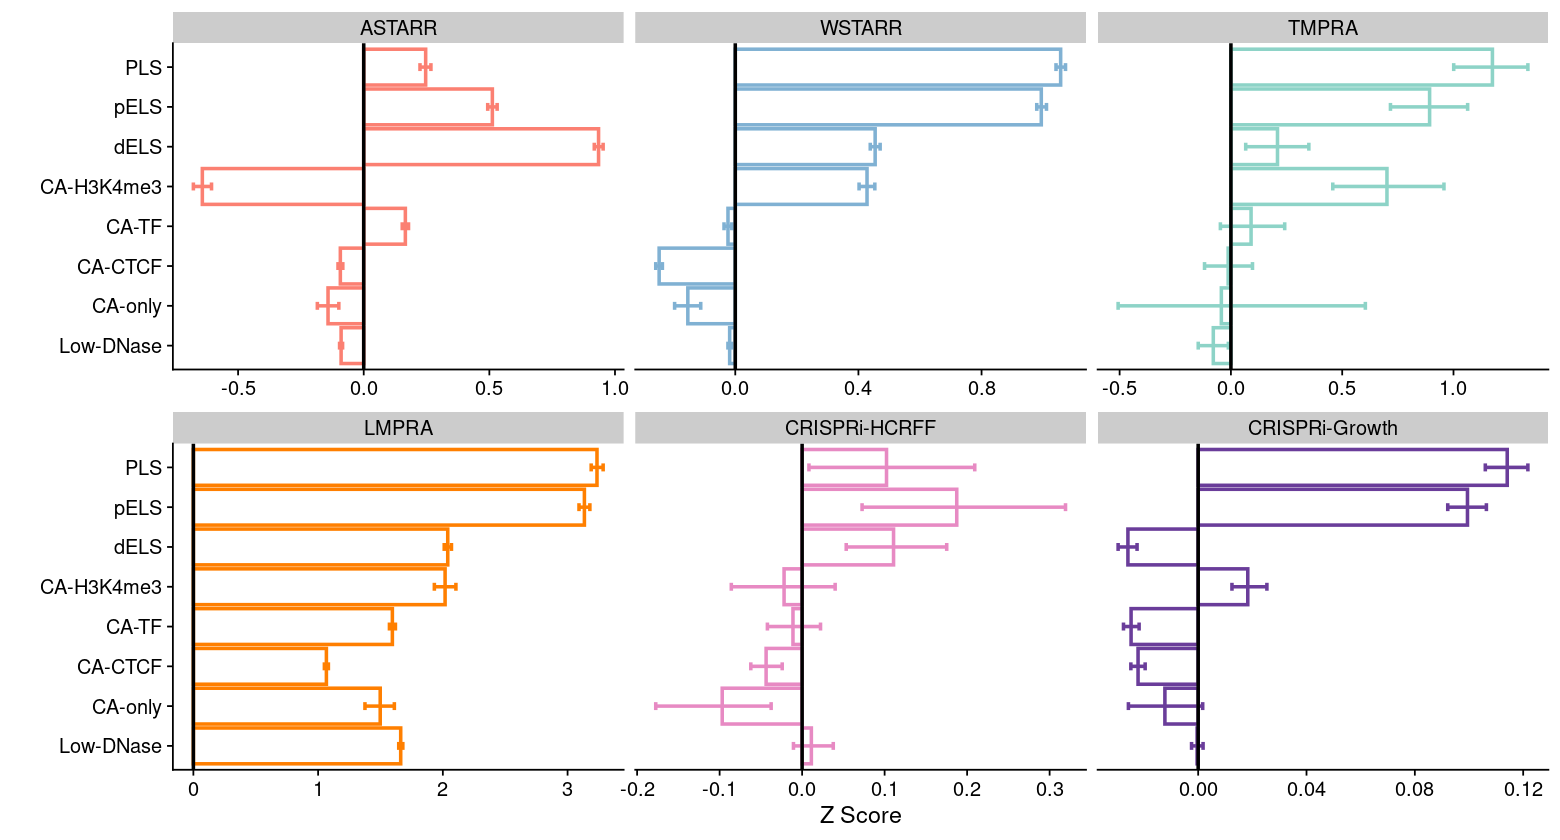

In [25]:
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase")
#vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase", "None")
vec_txt_color = c(
    "ASTARR" = "#fb8072", 
    "WSTARR" = "#80b1d3", 
    "TMPRA"  = "#8dd3c7", 
    "LMPRA"  = "#ff7f00",
    "CRISPRi-HCRFF"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

dat = dat_peak_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Annot_Label, 
            y     = Mean,
            group = Assay_Label,
            color = Assay_Label
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Annot_Label, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay_Label, 
            color = Assay_Label
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    #geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Z Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay_Label, nrow=2, scales = "free_x") +
    theme(legend.position = "None")

options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


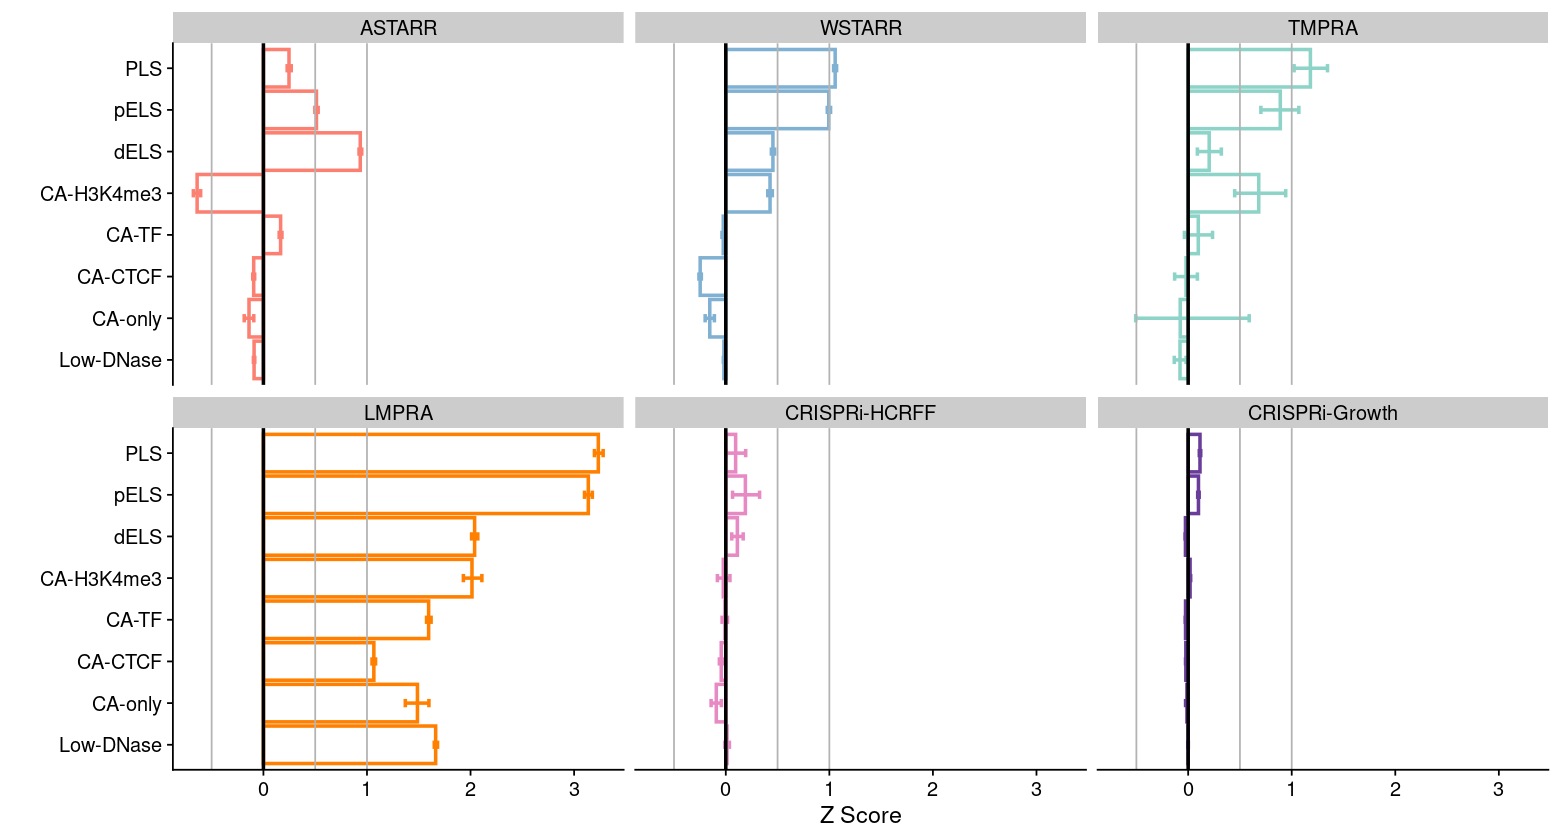

In [20]:
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase")
#vec_txt_label = c("PLS", "pELS", "dELS", "CA-H3K4me3", "CA-TF", "CA-CTCF", "CA-only", "Low-DNase", "None")
vec_txt_color = c(
    "ASTARR" = "#fb8072", 
    "WSTARR" = "#80b1d3", 
    "TMPRA"  = "#8dd3c7", 
    "LMPRA"  = "#ff7f00",
    "CRISPRi-HCRFF"  = "#e78ac3", 
    "CRISPRi-Growth" = "#6a3d9a")

dat = dat_peak_score_summary
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::filter(Annot_Label %in% vec_txt_label) %>%
    dplyr::mutate(
        Assay_Label = factor(Assay_Label, levels=vec_txt_assay),
        Annot_Label = factor(Annot_Label, levels=rev(vec_txt_label))
    )

gpt = ggplot(dat) + 
    geom_col(
        aes(
            x     = Annot_Label, 
            y     = Mean,
            group = Assay_Label,
            color = Assay_Label
        ),
        position = "dodge",
        fill = "white",
        size = 1
    ) +
    geom_errorbar(
        aes(
            x     = Annot_Label, 
            ymin  = Ci95_Lw, 
            ymax  = Ci95_Up,
            group = Assay_Label, 
            color = Assay_Label
           ), 
        width = 0.2,
        size  = 1
    ) +
    geom_hline(yintercept = 0, color="black", size = 1) +
    geom_hline(yintercept = c(1, 0.5, -0.5), color="grey70") +
    labs(x="", y="Z Score") +
    scale_color_manual(values = vec_txt_color) +
    theme_cowplot() +
    coord_flip() +
    facet_wrap(~Assay_Label, nrow=2) +
    theme(legend.position = "None")

options(repr.plot.height=7, repr.plot.width = 13)
print(gpt)

## Set plot style

In [7]:
### set text size
theme_text = theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 16)
)

In [8]:
dat = tribble(
    ~Group,                 ~Color,
    "Proximal:Active",      "#e41a1c", 
    "Distal:Active",        "#ff7f00",
    "Distal:Repressive",    "#377eb8",
    "Proximal:Repressive",  "#4daf4a", #"#f781bf",
    "Distal:Inactive",      "#bdbdbd",
    "Proximal:Inactive",    "#252525"
)
dat_annot_color = dat
vec_txt_color = setNames(dat$Color, dat$Group)
lst_txt_color = split(dat$Color, dat$Group)
theme_color   = scale_fill_manual(values=vec_txt_color)

## Explore: FCC Score distribution across group

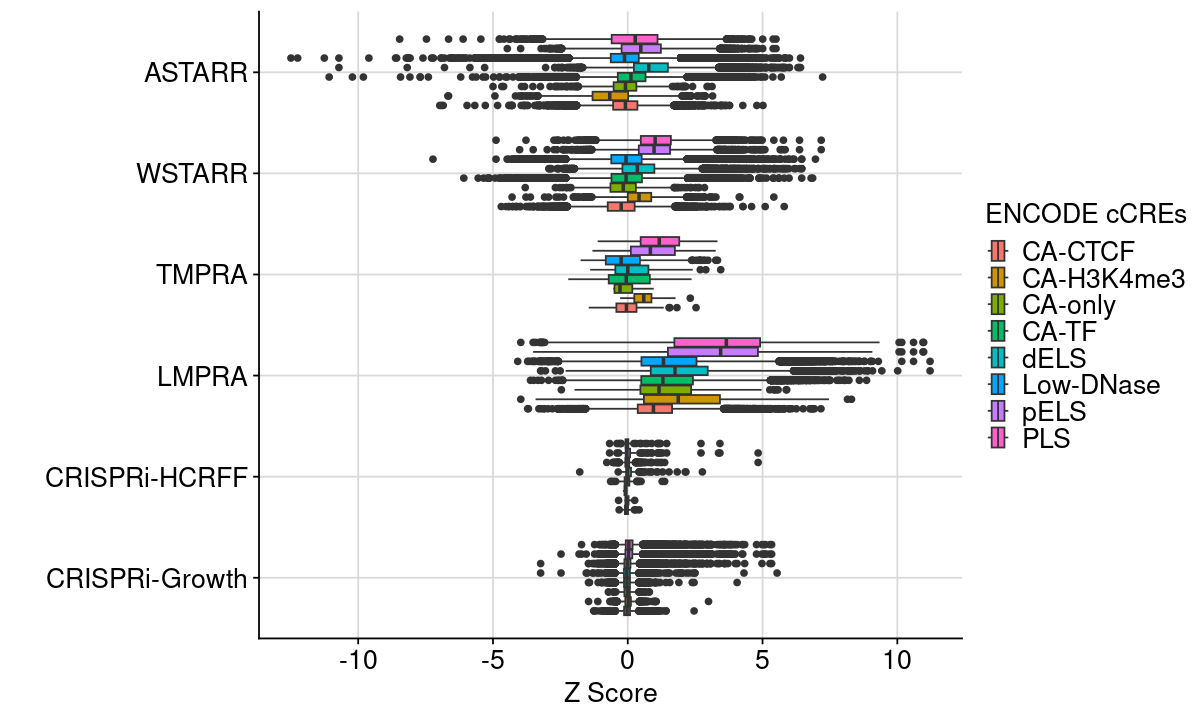

In [9]:
###
vec_txt_assay = c(
    "ASTARR", "WSTARR", 
    "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth"
)

###
dat = dat_region_merge_fcc
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
dat = dat %>% dplyr::filter(Group == "cCREs")

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Label)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "ENCODE cCREs") +
    theme_cowplot() +
    background_grid() +
    theme_text

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

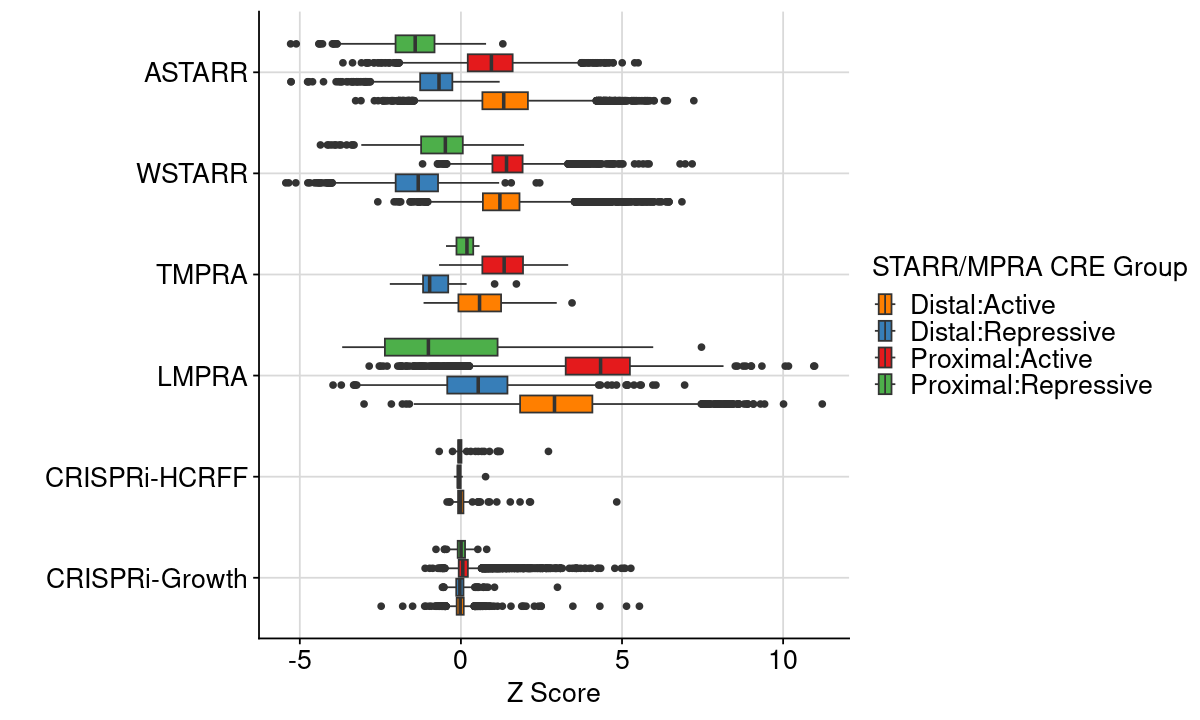

In [12]:
###
vec_txt_assay = c(
    "ASTARR", "WSTARR", 
    "TMPRA", "LMPRA", 
    "CRISPRi-HCRFF", 
    "CRISPRi-Growth"
)

###
dat = dat_region_merge_fcc
dat = dat %>% 
    dplyr::filter(Assay_Label %in% vec_txt_assay) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = rev(vec_txt_assay)))

###
gpt = ggplot(dat, aes(x=Zcore, y=Assay_Label, fill=Group)) +
    geom_boxplot() +
    labs(x = "Z Score", y = "", fill = "STARR/MPRA CRE Group") +
    theme_cowplot() +
    background_grid() +
    theme_color +
    theme_text

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)